# **MNIST classification with keras model**

import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/ICA/01_MNIST_keras'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [3]:
import tensorflow as tf
import keras
from keras.datasets import mnist


# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np
import time

# Import dependencies
import json
from keras.models import model_from_json, load_model

plt.style.use('seaborn-whitegrid')

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [4]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [5]:
# Deletes the existing model
# del model  

# Load the architecture and load the weights from separeted files
with open('Keras_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('Keras_model_weights.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








8259
prediction:  9
real value:  9


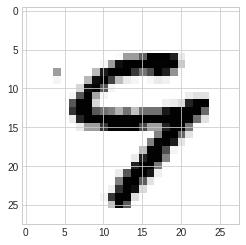

In [6]:
i=randint(1, x_test.shape[0])
print(i)
plt.imshow(x_test[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", model.predict_classes(x_test[i].reshape((1,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))

In [0]:
runs=100

In [8]:
times_model=np.zeros((7,3))
batchs=[4, 8, 16, 32, 64, 128, 256]

for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    model.predict_classes(x_test[0:batchnum].reshape((batchnum,28,28,1)))
  end_time_one_batch=time.time()
  times_model[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_model[i,1]=times_model[i,1]/(batchnum)
  times_model[i,2]=1/((times_model[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x1=[0, 1, 2, 3, 4, 5, 6]
# x2=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x1, times_model[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x1, my_xticks)

# plt.figure()
# plt.plot(x2, times_model[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x2, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_model[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_model[i,1])


ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [9]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))

 | 1.4276 | 1.3271 | 1.4358 | 1.4674 | 2.7849 | 5.3502 | 10.1163

 | 0.3569 | 0.1659 | 0.0897 | 0.0459 | 0.0435 | 0.0418 | 0.0395


With Frozen

In [0]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('Keras_model_graph_frozen.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/dense_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/conv2d_1_input:0')

In [14]:
# We launch a Session
sess = tf.Session(graph=graph)
times_frozen=np.zeros((7,3))
batchs=[4, 8, 16, 32, 64, 128, 256]

for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[0:batchnum].reshape((batchnum,28,28,1))})
  end_time_one_batch=time.time()
  times_frozen[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_frozen[i,1]=times_frozen[i,1]/(batchnum)
  times_frozen[i,2]=1/((times_frozen[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x3=[0, 1, 2, 3, 4, 5, 6]
# x4=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x3, times_frozen[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x3, my_xticks)

# plt.figure()
# plt.plot(x4, times_frozen[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x4, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,1])

ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [15]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))

 | 1.7161 | 1.1383 | 1.3606 | 1.3344 | 1.5041 | 1.9321 | 2.9234

 | 0.4290 | 0.1423 | 0.0850 | 0.0417 | 0.0235 | 0.0151 | 0.0114


Optimized

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('Keras_model_graph_optimized.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/dense_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/conv2d_1_input:0')

In [18]:
# We launch a Session
sess = tf.Session(graph=graph)

times_optimized=np.zeros((7,3))

batchs=[4, 8, 16, 32, 64, 128, 256]
for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[0:batchnum].reshape((batchnum,28,28,1))})
  end_time_one_batch=time.time()
  times_optimized[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_optimized[i,1]=times_optimized[i,1]/(batchnum)
  times_optimized[i,2]=1/((times_optimized[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x5=[0, 1, 2, 3, 4, 5, 6]
# x6=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x5, times_optimized[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x5, my_xticks)

# plt.figure()
# plt.plot(x6, times_optimized[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x6, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,1])

ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [19]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

 | 1.7839 | 1.0591 | 1.3164 | 1.1559 | 1.6367 | 1.7226 | 2.7676

 | 0.4460 | 0.1324 | 0.0823 | 0.0361 | 0.0256 | 0.0135 | 0.0108


Comparison

Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 1.4276 | 1.3271 | 1.4358 | 1.4674 | 2.7849 | 5.3502 | 10.1163
Frozen | 1.7161 | 1.1383 | 1.3606 | 1.3344 | 1.5041 | 1.9321 | 2.9234
Optimized | 1.7839 | 1.0591 | 1.3164 | 1.1559 | 1.6367 | 1.7226 | 2.7676


Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 0.3569 | 0.1659 | 0.0897 | 0.0459 | 0.0435 | 0.0418 | 0.0395
Frozen | 0.4290 | 0.1423 | 0.0850 | 0.0417 | 0.0235 | 0.0151 | 0.0114
Optimized | 0.4460 | 0.1324 | 0.0823 | 0.0361 | 0.0256 | 0.0135 | 0.0108


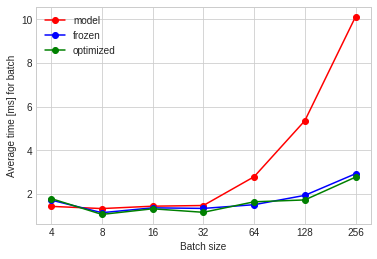

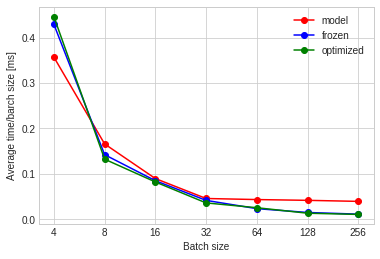

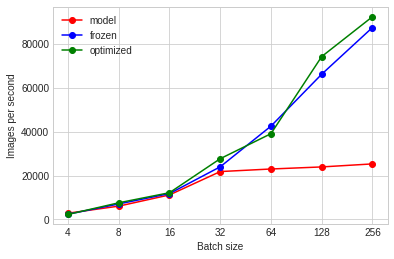

In [20]:
x1=[0, 1, 2, 3, 4, 5, 6]


plt.plot(x1, times_model[:,0], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,0], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,0], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x1, my_xticks)

plt.figure()
plt.plot(x1, times_model[:,1], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,1], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,1], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x1, my_xticks)


plt.figure()
plt.plot(x1, times_model[:,2], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,2], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,2], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Images per second')
plt.xlabel('Batch size')
plt.xticks(x1, my_xticks)


print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print('')
print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

In [21]:
! nvidia-smi

Thu Dec  5 15:54:02 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    38W / 250W |   1077MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  